# Get the nearest climate for proxies

In this tutorial, we introduce how to get the nearest climate for proxies with `cfr`.

In [1]:
%load_ext autoreload
%autoreload 2

import cfr
import pandas as pd
import numpy as np
import os

## Load the PAGES2k network stored in a pandas `DataFrame`

In [2]:
df = pd.read_pickle('./data/pages2k_dataset.pkl')
df.columns

Index(['paleoData_pages2kID', 'dataSetName', 'archiveType', 'geo_meanElev',
       'geo_meanLat', 'geo_meanLon', 'year', 'yearUnits',
       'paleoData_variableName', 'paleoData_units', 'paleoData_values',
       'paleoData_proxy'],
      dtype='object')

## Create a `ProxyDatabase` and load from the pandas `DataFrame`

In [3]:
pdb = cfr.ProxyDatabase().from_df(df)

## Load climate data to `ClimateField`s

In [5]:
dirpath = './data/icesm_last_millennium_historical'

fd_tas = cfr.ClimateField().load_nc(
    os.path.join(dirpath, 'tas_sfc_Amon_iCESM_past1000historical_085001-200512.nc'),
    load=True) # load into the memory to accelerate later processing

## Get the nearest climate from a `ClimateField` for a `ProxyRecord`

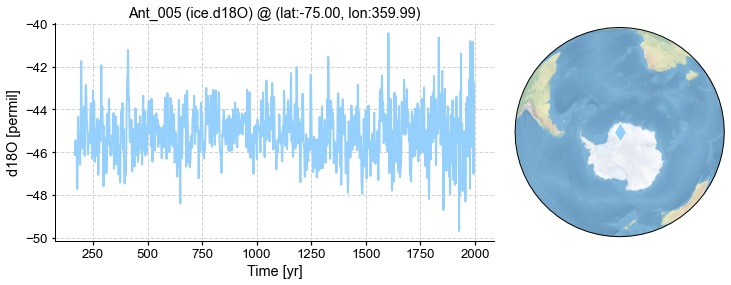

In [6]:
pobj = pdb.records['Ant_005']
fig, ax = pobj.plot()

In [7]:
pobj.get_clim(fd_tas)

In [8]:
pobj.clim['tas'].da

<xarray.DataArray 'tas' (time: 13872)>
array([248.87474, 242.98064, 234.44029, ..., 233.60123, 243.2134 ,
       249.26338], dtype=float32)
Coordinates:
  * time     (time) object 0850-01-17 00:00:00 ... 2005-12-17 00:00:00
    lat      float32 -74.84
    lon      float32 357.5
Attributes:
    long_name:  Reference height temperature
    units:      K

## Get the nearest climate from a `ClimateField` for a `ProxyDatabase`

In [9]:
pdb_TRW = pdb.filter(by='ptype', keys=['tree.TRW'])

In [14]:
pdb_TRW.del_clim()
pdb_TRW.get_clim(fd_tas, tag='model')  # with a tag, the variable name will be modified in format "tag.var"

Getting the nearest climate for ProxyRecord: 100%|██████████| 354/354 [02:09<00:00,  2.73it/s]


In [15]:
pdb_TRW.records['NAm_153'].clim['model.tas'].da

<xarray.DataArray 'tas' (time: 13872)>
array([256.63867, 259.30438, 263.68216, ..., 274.59763, 266.72495,
       258.0086 ], dtype=float32)
Coordinates:
  * time     (time) object 0850-01-17 00:00:00 ... 2005-12-17 00:00:00
    lat      float32 52.11
    lon      float32 242.5
Attributes:
    long_name:  Reference height temperature
    units:      K

In [16]:
pdb_TRW.records['NAm_153'].clim.keys()

dict_keys(['model.tas'])